In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = 'terrausd-wormhole-historical-day-data-all-tokeninsight (1).csv'
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], utc=True)

data.sort_values(by='Date', inplace=True)

data['Price_change_pct'] = data['Price'].pct_change() * 100

depeg_dates = data[(data['Price_change_pct'] > 10) | (data['Price_change_pct'] < -10)]

depeg_table = pd.DataFrame({
    'Date': depeg_dates['Date'],
    'Previous_day_price': data['Price'].shift(1)[depeg_dates.index],
    'Current_day_price': depeg_dates['Price']
}).dropna()

major_depeg_date = depeg_dates.loc[depeg_dates['Price_change_pct'].idxmin()]

depeg_table, major_depeg_date[['Date', 'Price_change_pct']]


(                         Date  Previous_day_price  Current_day_price
 743 2022-05-10 00:00:00+00:00            0.994165           0.811663
 740 2022-05-13 00:00:00+00:00            0.814592           0.544668
 739 2022-05-14 00:00:00+00:00            0.544668           0.122647
 738 2022-05-15 00:00:00+00:00            0.122647           0.183665
 737 2022-05-16 00:00:00+00:00            0.183665           0.150959
 ..                        ...                 ...                ...
 40  2024-04-12 00:00:00+00:00            0.025725           0.020177
 39  2024-04-13 00:00:00+00:00            0.020177           0.016059
 32  2024-04-20 00:00:00+00:00            0.017541           0.020448
 22  2024-04-30 00:00:00+00:00            0.018802           0.012187
 21  2024-05-01 00:00:00+00:00            0.012187           0.017881
 
 [93 rows x 3 columns],
 Date                2022-05-14 00:00:00+00:00
 Price_change_pct                   -77.482231
 Name: 739, dtype: object)

# Terra

In [2]:
data.sort_values(by='Date', inplace=True)

data['Price_change_pct'] = data['Price'].pct_change() * 100

depeg_dates = data[(data['Price'].shift(1) >= 0.9) & (data['Price'].shift(1) <= 1.1) & (data['Price_change_pct'] < -10)]

depeg_table = pd.DataFrame({
    'Date': depeg_dates['Date'],
    'Previous_day_price': data['Price'].shift(1)[depeg_dates.index],
    'Current_day_price': depeg_dates['Price']
}).dropna()

depeg_table

,Date,Previous_day_price,Current_day_price
743,2022-05-10 00:00:00+00:00,0.994165,0.811663


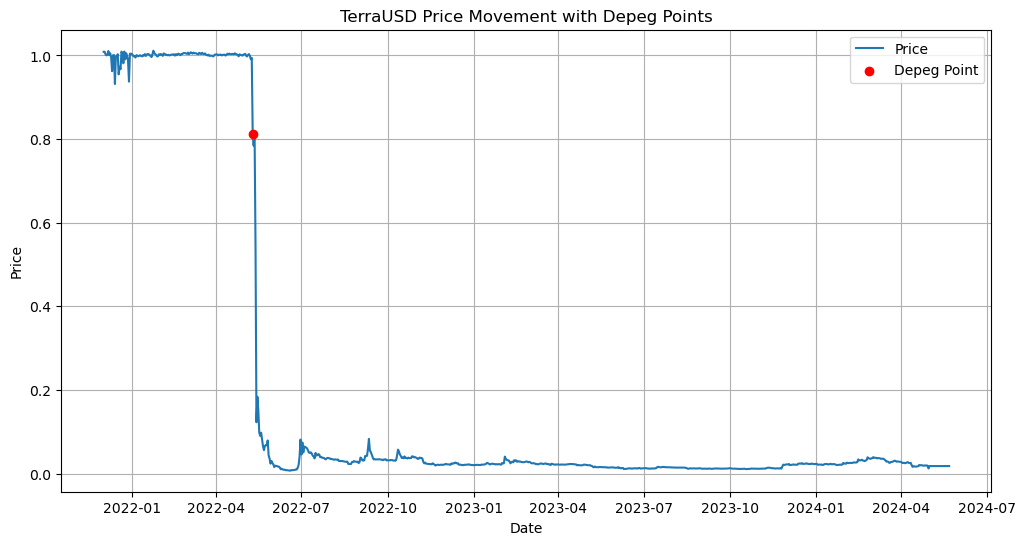

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Price')
plt.scatter(depeg_table['Date'], depeg_table['Current_day_price'], color='red', label='Depeg Point', zorder=5)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TerraUSD Price Movement with Depeg Points')
plt.legend()
plt.grid(True)
plt.show()


# Iron cash

In [4]:
file_path = 'iron-historical-day-data-all-tokeninsight.csv'
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], utc=True)

data.sort_values(by='Date', inplace=True)

data['Price_change_pct'] = data['Price'].pct_change() * 100

depeg_dates = data[(data['Price'].shift(1) >= 0.9) & (data['Price'].shift(1) <= 1.1) & (data['Price_change_pct'] < -10)]

depeg_table = pd.DataFrame({
    'Date': depeg_dates['Date'],
    'Previous_day_price': data['Price'].shift(1)[depeg_dates.index],
    'Current_day_price': depeg_dates['Price']
}).dropna()

major_depeg_date = depeg_dates.loc[depeg_dates['Price_change_pct'].idxmin()]

depeg_table, major_depeg_date[['Date', 'Price_change_pct']]


(                          Date  Previous_day_price  Current_day_price
 1099 2021-05-19 00:00:00+00:00            0.997171           0.840003
 1069 2021-06-18 00:00:00+00:00            0.978961           0.749159
 1037 2021-07-20 00:00:00+00:00            0.932062           0.770588
 1026 2021-07-31 00:00:00+00:00            0.935822           0.767131
 1016 2021-08-10 00:00:00+00:00            0.966175           0.762158
 1013 2021-08-13 00:00:00+00:00            0.962511           0.766657
 1009 2021-08-17 00:00:00+00:00            0.932563           0.766388
 851  2022-01-22 00:00:00+00:00            0.983655           0.869888
 573  2022-10-27 00:00:00+00:00            0.960062           0.546272
 568  2022-11-01 00:00:00+00:00            0.966083           0.551414
 564  2022-11-05 00:00:00+00:00            0.989438           0.556922
 561  2022-11-08 00:00:00+00:00            0.966569           0.557124
 557  2022-11-12 00:00:00+00:00            1.005585           0.551552
 523  

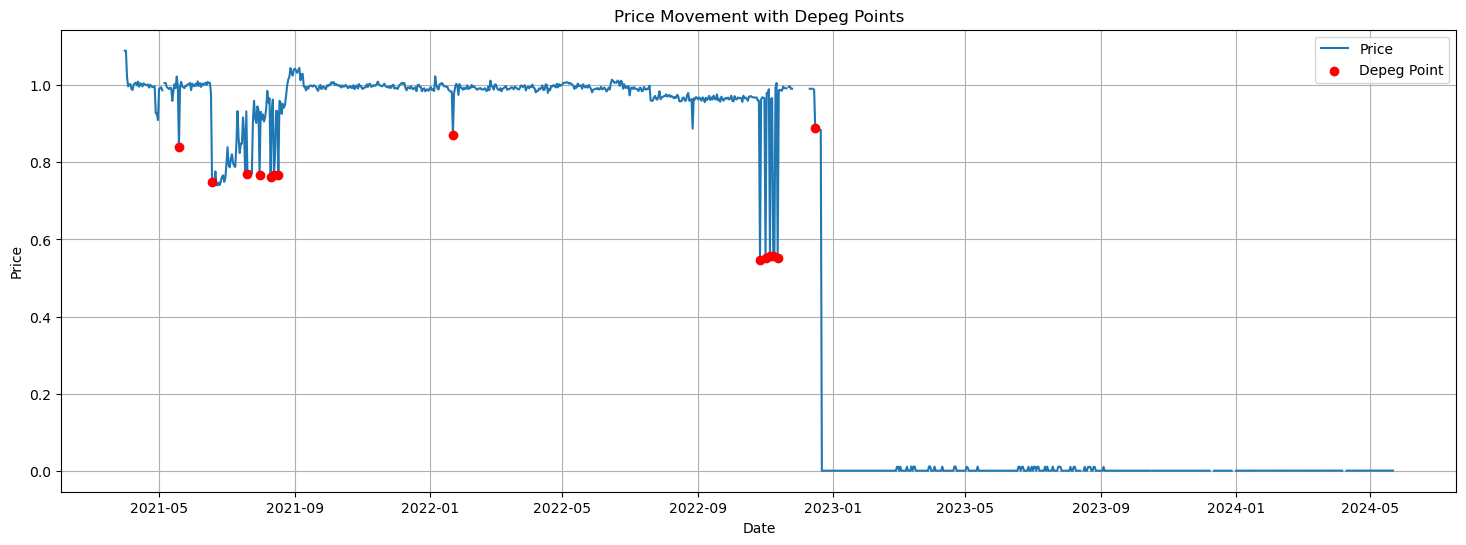

In [5]:
plt.figure(figsize=(18, 6))
plt.plot(data['Date'], data['Price'], label='Price')

plt.scatter(depeg_table['Date'], depeg_table['Current_day_price'], color='red', label='Depeg Point', zorder=5)

plt.annotate('Major Depeg', xy=(major_depeg_date['Date'], major_depeg_date['Price_change_pct']),
             xytext=(major_depeg_date['Date'], major_depeg_date['Price_change_pct'] + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Movement with Depeg Points')
plt.legend()
plt.grid(True)
plt.show()

  # Neutrino 

In [16]:
file_path_new = 'neutrino-usd-historical-day-data-all-tokeninsight.csv'
data_new = pd.read_csv(file_path_new)

data_new['Date'] = pd.to_datetime(data_new['Date'])

lower_bound = 1 * 0.95
upper_bound = 1 * 1.05

lost_peg_new = data_new[(data_new['Price'] < lower_bound) | (data_new['Price'] > upper_bound)].copy()

total_peg_losses_new = lost_peg_new.shape[0]

lost_peg_new.loc[:, 'Diff'] = lost_peg_new['Date'].diff().dt.days.fillna(1)
lost_peg_new.loc[:, 'Event'] = (lost_peg_new['Diff'] > 1).cumsum()
peg_loss_events_new = lost_peg_new.groupby('Event').agg({'Date': ['min', 'max'], 'Price': ['min', 'max']})
peg_loss_events_new.columns = ['Start Date', 'End Date', 'Min Price', 'Max Price']
peg_loss_events_new['Duration (days)'] = (peg_loss_events_new['End Date'] - peg_loss_events_new['Start Date']).dt.days + 1

print(peg_loss_events_new)

total_events_new = peg_loss_events_new.shape[0]
average_duration_new = peg_loss_events_new['Duration (days)'].mean()
min_duration_new = peg_loss_events_new['Duration (days)'].min()
max_duration_new = peg_loss_events_new['Duration (days)'].max()
average_min_price_new = peg_loss_events_new['Min Price'].mean()
average_max_price_new = peg_loss_events_new['Max Price'].mean()

peg_loss_summary_new = {
    'Total Peg Losses': total_peg_losses_new,
    'Total Peg Loss Events': total_events_new,
    'Average Event Duration (days)': average_duration_new,
    'Minimum Event Duration (days)': min_duration_new,
    'Maximum Event Duration (days)': max_duration_new,
    'Average Minimum Price During Events': average_min_price_new,
    'Average Maximum Price During Events': average_max_price_new
}

print(peg_loss_summary_new)

                     Start Date                  End Date  Min Price  \
Event                                                                  
0     2021-05-20 00:00:00+00:00 2024-06-18 00:00:00+00:00   0.012371   

       Max Price  Duration (days)  
Event                              
0         1.3172             1126  
{'Total Peg Losses': 619, 'Total Peg Loss Events': 1, 'Average Event Duration (days)': 1126.0, 'Minimum Event Duration (days)': 1126, 'Maximum Event Duration (days)': 1126, 'Average Minimum Price During Events': 0.0123709, 'Average Maximum Price During Events': 1.3172003}


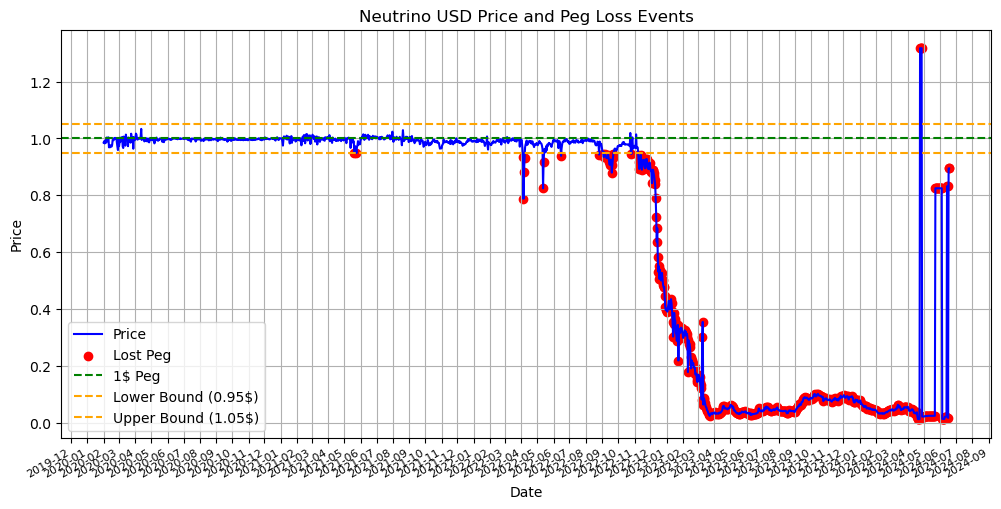

In [20]:
plt.figure(figsize=(12, 6))

plt.plot(data_new['Date'], data_new['Price'], label='Price', color='blue')

plt.scatter(lost_peg_new['Date'], lost_peg_new['Price'], color='red', label='Lost Peg')

plt.axhline(1, color='green', linestyle='--', label='1$ Peg')
plt.axhline(lower_bound, color='orange', linestyle='--', label='Lower Bound (0.95$)')
plt.axhline(upper_bound, color='orange', linestyle='--', label='Upper Bound (1.05$)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate()
plt.xticks(fontsize=8)  

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Neutrino USD Price and Peg Loss Events')
plt.legend()
plt.grid(True)
plt.show()

# Tether

In [19]:
file_path_tether = 'tether-historical-day-data-all-tokeninsight.csv'
data_tether = pd.read_csv(file_path_tether)

data_tether['Date'] = pd.to_datetime(data_tether['Date'])

lower_bound = 1 * 0.95
upper_bound = 1 * 1.05

lost_peg_tether = data_tether[(data_tether['Price'] < lower_bound) | (data_tether['Price'] > upper_bound)].copy()

total_peg_losses_tether = lost_peg_tether.shape[0]

lost_peg_tether.loc[:, 'Diff'] = lost_peg_tether['Date'].diff().dt.days.fillna(1)
lost_peg_tether.loc[:, 'Event'] = (lost_peg_tether['Diff'] > 1).cumsum()
peg_loss_events_tether = lost_peg_tether.groupby('Event').agg({'Date': ['min', 'max'], 'Price': ['min', 'max']})
peg_loss_events_tether.columns = ['Start Date', 'End Date', 'Min Price', 'Max Price']
peg_loss_events_tether['Duration (days)'] = (peg_loss_events_tether['End Date'] - peg_loss_events_tether['Start Date']).dt.days + 1

print(peg_loss_events_tether)

total_events_tether = peg_loss_events_tether.shape[0]
average_duration_tether = peg_loss_events_tether['Duration (days)'].mean()
min_duration_tether = peg_loss_events_tether['Duration (days)'].min()
max_duration_tether = peg_loss_events_tether['Duration (days)'].max()
average_min_price_tether = peg_loss_events_tether['Min Price'].mean()
average_max_price_tether = peg_loss_events_tether['Max Price'].mean()

peg_loss_summary_tether = {
    'Total Peg Losses': total_peg_losses_tether,
    'Total Peg Loss Events': total_events_tether,
    'Average Event Duration (days)': average_duration_tether,
    'Minimum Event Duration (days)': min_duration_tether,
    'Maximum Event Duration (days)': max_duration_tether,
    'Average Minimum Price During Events': average_min_price_tether,
    'Average Maximum Price During Events': average_max_price_tether
}

print(peg_loss_summary_tether)


                     Start Date                  End Date  Min Price  \
Event                                                                  
0     2015-02-25 00:00:00+00:00 2018-08-09 00:00:00+00:00   0.572521   

       Max Price  Duration (days)  
Event                              
0       1.323095             1262  
{'Total Peg Losses': 32, 'Total Peg Loss Events': 1, 'Average Event Duration (days)': 1262.0, 'Minimum Event Duration (days)': 1262, 'Maximum Event Duration (days)': 1262, 'Average Minimum Price During Events': 0.572521, 'Average Maximum Price During Events': 1.32309531}


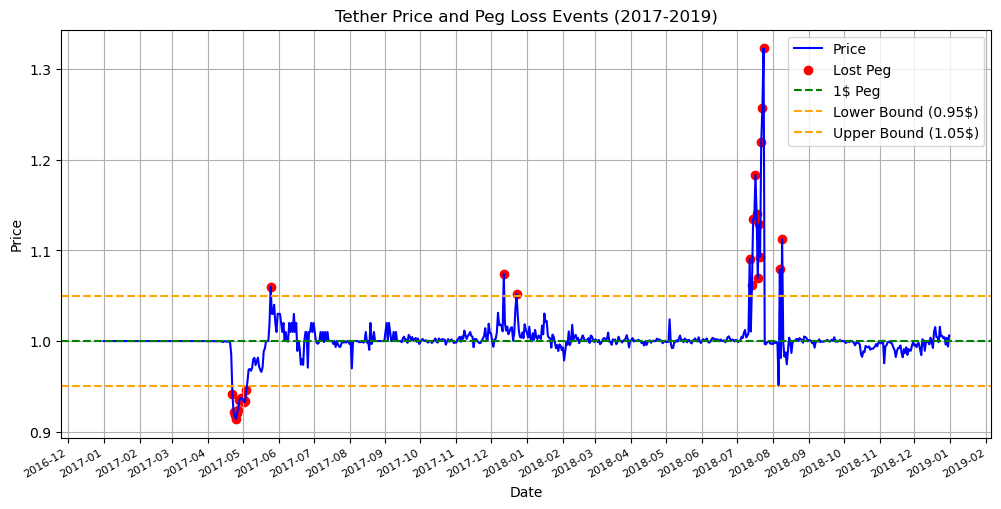

In [33]:
# Since there were no depeges earlier or later than the dates presented, we only presented 
# the ranges of the dates where the depeges happened and not all the timeframe of the dataset
data_tether['Date'] = pd.to_datetime(data_tether['Date'])

lower_bound = 1 * 0.95
upper_bound = 1 * 1.05

data_tether_filtered = data_tether[(data_tether['Date'] >= '2017-01-01') & (data_tether['Date'] <= '2018-12-31')]

lost_peg_tether_filtered = data_tether_filtered[(data_tether_filtered['Price'] < lower_bound) | (data_tether_filtered['Price'] > upper_bound)].copy()

plt.figure(figsize=(12, 6))

plt.plot(data_tether_filtered['Date'], data_tether_filtered['Price'], label='Price', color='blue')

plt.scatter(lost_peg_tether_filtered['Date'], lost_peg_tether_filtered['Price'], color='red', label='Lost Peg')

plt.axhline(1, color='green', linestyle='--', label='1$ Peg')
plt.axhline(lower_bound, color='orange', linestyle='--', label='Lower Bound (0.95$)')
plt.axhline(upper_bound, color='orange', linestyle='--', label='Upper Bound (1.05$)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate()
plt.xticks(fontsize=8)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tether Price and Peg Loss Events (2017-2019)')
plt.legend()
plt.grid(True)
plt.show()